# Fiche de TD 02
**PARTIE I**

## Introduction

### Objectifs

Plusieurs objectifs, dans ce TD :

1. Manipuler la POO que l'on a croisé rapidement lors du CM n°2
2. Manipuler les listes et surtout les listes de listes
3. Manipuler un peu les tuples
4. Découvrir et _jouer_ avec le module `ipythonblocks` 

Le but du TD sera de réaliser des petites _animations_ de ce type :

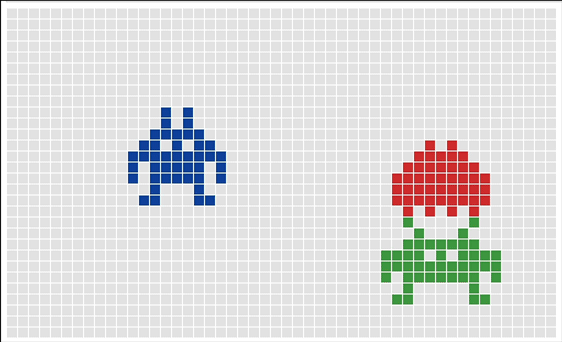

D'autre part, ce TD montre une méthode classique de conception : séparer le modèle d'un objet de sa visualisation. Ce concept est important en programmation : il permet de bien structurer les programmes, notamment lorsque des interfaces graphiques sont mises en oeuvre.

Cette animation a été réalisée directement dans un notebook, en exécutant les instructions suivantes :

```python
arene = Arene(50, 30)
pipou = Vert()
bibou = Bleu()
ridou = Rouge()
arene.ajout(pipou, 20, 35)
arene.ajout(bibou, 10, 10)
arene.ajout(ridou, 11, 36)
pipou.aller_a(0, 0)
bibou.aller_a(2, 35)
ridou.aller_a(23, 5)
arene.animation()
```

Mais, la route est encore longue avant d'en arriver là... 

### Prérequis

1. Avoir installé `ipythonblocks` : dans un terminal ou une invite de commandes, tapez : `pip install ipythonblocks` 
2. Avoir relu son cours sur la POO et connaître la création d'une classe en Python, la notion d'initialiseur.
3. Avoir relu son cours sur les listes : savoir créer une liste, accéder à un élément par son indice, parcourir les éléments via une boucle `for`

Dans cette première partie, les monstres seront dessinés mais pas animés. Nous allons modéliser les deux objets :

- l'arène
- le monstre

## La modélisation

### L'arène

Elle est constituée de :

- une `largeur` et une `hauteur` (2 entiers, pas trop grand, disons dans l'intervalle $[20; 60]$)
- une liste de `monstres` initialement vide
- une `zone` : un objet BlockGrid où les monstres seront dessinés.

#### Question 1

Compléter la définition de la classe `Arene`.

**Remarque** : au fil des questions, vous reviendrez enrichir votre classe `Arene` ici. N'oubliez pas d'exécuter la cellule pour prendre en compte les changements. Vous devez aussi réexécuter les éventuelles créations d'arène.

In [ ]:
import ipythonblocks as ib

GRIS = (230, 230, 230)

class Arene:
    
    def __init__(self, largeur, hauteur):
        self.largeur = ...
        ... = hauteur
        ...
        self.zone = ib.BlockGrid(largeur, hauteur, fill=GRIS, block_size=10)

Un _BlockGrid_ possède une méthode `show` qui permet d'afficher dans une cellule de notebook. Définir une méthode `show` pour l'arène qui permette de l'afficher. Tester en créant une arène de 10x10 et en affichant cette arène :

In [ ]:
test = Arene(10, 10)

In [ ]:
test.show()

### Un monstre

Un monstre est modélisé par : 
- un `masque` qui est une matrice de 0 et de 1
- une `couleur`
- une `arene` qui pour l'instant sera initialisée à `None`
- une `position` un couple d'entiers, initialisé à 0, 0 pour l'instant 

#### Question 2

Compléter la définition de la classe monstre ci-dessous :

In [ ]:
class Monstre:
    
    def __init__(self, masque, couleur):
        self.masque = ...
        ...
        self.arene = ...
        self.position = ...

Nous allons au cours du TD venir enrichir cette classe (avec d'autres attributs, et des méthodes) ainsi que la classe `Arene`.

### Des monstres particuliers

Les monstres que nous allons manipuler, même s'ils partagent des caractéristiques (tous ont une couleur, une forme, pourront s'afficher dans une arène etc.) ont leur spécificité. Sans entrer dans les détails, en POO le concept qui permet de mettre cette idée en oeuvre s'appelle l'héritage.

Voici comment nous pouvons créer une classe de monstre `Vert` :

In [ ]:
VERT = (67, 160, 71)

class Vert(Monstre):
    
    def __init__(self):
        masque = [[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                  [1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
                  [1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
                  [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
                  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                  [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0]]
        Monstre.__init__(self, masque, VERT)

#### Question 3

En vous aidant du fichier OpenDocument `monstres.ods`, définir une ou deux autres classes de monstres. Vous trouverez de nombreuses couleurs par exemple sur ce [tableau des couleurs](https://htmlcolorcodes.com/fr/tableau-de-couleur/)



In [ ]:
# votre monstre 1


In [ ]:
# votre monstre 2


#### La représentation dans une arène du monstre vert

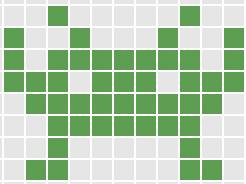

### Ajouter des monstres à une arène

Si vous avez créé des classes de monstres, vous pouvez toujours en créer des instances comme ceci :

```python
m1 = Vert()
m2 = Orange()
m3 = Orange()
m4 = Bleu()
```

Ces objets sont juste des modèles de monstres, et ne peuvent pour l'instant pas se visualiser à l'aide de petits carrés colorés. Pour cela, il faut ajouter ces monstres à une arène. Si donc vous avez aussi créé une arène :

```python
arene = Arene(50, 30)
```

On voudrait pouvoir ajouter des monstres :

```python
arene.ajout(m1, 5, 12)
```

Cette instruction signifie qu'on ajoute le monstre référencé par la variable `m1` (on dira juste _le monstre m1_) à l'arène en position ligne 5, colonne 12.

#### Question 4

Compléter votre classe `Arene` avec la définition de la méthode `ajout` qui doit réaliser les actions suivantes :

- faire mettre à jour la propriété `arene` du monstre
- faire mettre à jour la `position` du monstre
- ajouter à le `monstre` à la liste des monstres de l'arène

Voici le début de cette méthode, qu'il vous faut copier et coller dans la définition de votre classe `Arene` et ensuite compléter :

```python
def ajout(self, monstre, ligne, colonne):
    monstre.arene = ...  # ici il faut mettre l'objet qui représente l'arène 
    monstre.position = ...
    ...                  # ici l'ajout du monstre à la liste des monstres
```

#### Question 5 -- Premiers tests

Créer une arène $A_0$ de 50x30 :

In [ ]:
# Ici votre arène A0


Créer 2 monstres $M_1$ et $M_2$ :

In [ ]:
# Ici vos monstres M1 et M2



Ajouter à l'arène, $M_1$ en position $(5, 2)$ et $M_2$ en position $(20, 12)$ :

In [ ]:
# Ici pour ajouter vos monstres



Pour le moment nous ne pouvons pas encore voir nos monstres mais il est quand même possible de tester qu'ils sont bien là. Par exemple, cet appel qui test que le premier élément de la liste des monstres est bien de type `Monstre` :

In [20]:
isinstance(A0.monstres[0], Monstre) 

True

Comment testeriez-vous que le deuxième est un monstre particulier ? `Bleu` par exemple.

In [ ]:
# Ici votre test sur le 2e élémént de la liste des monstres


## La visualisation

### Dessiner les monstres

Maintenant que notre arène dispose d'une liste de monstres, elle peut leur demander de se _dessiner_. La classe `Arene` va donc définir une méthode `dessiner` qui va parcourir la liste des monstres et demander à chacun d'eux de se dessiner, c'est-à-dire d'**invoquer** sa propre méthode `dessiner`. Vous en déduisez donc que la classe `Monstre` doit aussi implémenter une méthode `dessiner`.

#### Question 6

Ajouter à votre classe `Arene` la méthode `dessiner` décrite ci-dessus. 

### Un monstre qui se dessine

Que doit faire un monstre qui se dessine ? Il doit parcourir la `zone` de l'arène qui le concerne (réfléchissez bien à ce que cela peut bien vouloir dire) et changer la couleur des carrés en fonction de son masque.

#### Question 7

Ajouter à la classe `Monstre` la méthode `dessiner` en la complétant :

```python
def dessiner(self):
    mask = self.masque
    color = self.couleur
    lig_monstre = ...
    col_monstre = ...
    for ligne in ... :
        for colonne in ...:
            if ... :
                self.arene.zone[..., ...] = ...
```

**Attention** Après avoir ajouté la méthode `dessiner` à la classe `Monstre`, vous devrez :

- relancer la cellule de la définition de la classe `Monstre`
- relancer les cellules des définitions des autres classes de monstres spécifiques `Vert`, `Bleu` etc.

### Effectuer des tests

#### Question 8 : relancer la création de $A_0$

#### Question 9 : relancer la création des monstres

#### Question 10 : ajouter les monstres à l'arène...

#### Question 11 : et afficher l'ensemble...

Fin de la première partie : retrouver la suite dans la partie II, nous allons animer les monstres.

--- 

Fiche créée par **Sébastien HOARAU** inspirée d'une activité proposée par **Anne Héam**, modifée par **J.-L. Thirot**
L'original peut être consulté ici : <a href="http://revue.sesamath.net/spip.php?article1476">ici</a>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.